# Exploring the data and cleaning the data

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt  
import matplotlib.lines as mlines
import pandas as pd   
import seaborn as sns
from random import sample
from sklearn.linear_model import LinearRegression
import scipy.stats as st
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant,eval_measures
from sklearn.model_selection import train_test_split
import sys


from sklearn.preprocessing import MinMaxScaler, StandardScaler # For rescaling metrics to fit 0 to 1 range
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/
This is the link to the competition we are participating in.

In [ ]:
#upload the input data from excel
import io
from google.colab import files
uploaded = files.upload()
file = io.BytesIO(uploaded['training_data.csv'])

Saving training_data.csv to training_data (1).csv


In [ ]:
df = pd.read_csv('training_data.csv') 
df.head()

,city,year,weekofyear,month,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,4,4/30/90,0.122600,0.103725,0.198483,0.177617,12.42,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,5,5/7/90,0.169900,0.142175,0.162357,0.155486,22.82,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,5,5/14/90,0.032250,0.172967,0.157200,0.170843,34.54,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,5,5/21/90,0.128633,0.245067,0.227557,0.235886,15.36,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,5,5/28/90,0.196200,0.262200,0.251200,0.247340,7.52,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [ ]:
df.shape
df['city'].value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [ ]:
# uploading the Test data (dataset without total_cases)
uploaded = files.upload()
file = io.BytesIO(uploaded['test_data_features.csv'])

Saving test_data_features.csv to test_data_features (1).csv


In [ ]:
test_df = pd.read_csv('test_data_features.csv') 
test_df.head()

,city,year,weekofyear,month,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,4,4/29/08,-0.0189,-0.018900,0.102729,0.091200,78.60,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,5,5/6/08,-0.0180,-0.012400,0.082043,0.072314,12.56,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,5,5/13/08,-0.0015,NaN,0.151083,0.091529,3.66,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,5,5/20/08,NaN,-0.019867,0.124329,0.125686,0.00,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,5,5/27/08,0.0568,0.039833,0.062267,0.075914,0.76,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [ ]:
test_df.shape


(416, 25)

In [ ]:
#test data info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   416 non-null    object 
 1   year                                   416 non-null    int64  
 2   weekofyear                             416 non-null    int64  
 3   month                                  416 non-null    int64  
 4   week_start_date                        416 non-null    object 
 5   ndvi_ne                                373 non-null    float64
 6   ndvi_nw                                405 non-null    float64
 7   ndvi_se                                415 non-null    float64
 8   ndvi_sw                                415 non-null    float64
 9   precipitation_amt_mm                   414 non-null    float64
 10  reanalysis_air_temp_k                  414 non-null    float64
 11  reanal

In [ ]:
#train data info
df.describe()

,year,weekofyear,month,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,6.418269,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,3.451806,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,3.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,6.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,9.000000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,12.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [ ]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
month                                      0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_ma

In [ ]:
df.drop(['week_start_date'], inplace=True, axis=1)
test_df.drop(['week_start_date'], inplace=True, axis=1)

In [ ]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
month                                      0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [ ]:
df.fillna(method='ffill', inplace=True)
test_df.fillna(method='ffill', inplace=True)
df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
month                                    0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   month                                  1456 non-null   int64  
 4   ndvi_ne                                1456 non-null   float64
 5   ndvi_nw                                1456 non-null   float64
 6   ndvi_se                                1456 non-null   float64
 7   ndvi_sw                                1456 non-null   float64
 8   precipitation_amt_mm                   1456 non-null   float64
 9   reanalysis_air_temp_k                  1456 non-null   float64
 10  reanalysis_avg_temp_k                  1456 non-null   float64
 11  rean

In [ ]:
df['city'] = df['city'].astype('str')
test_df['city'] = test_df['city'].astype('str')

In [ ]:
#Assigning the sj to 0 and iq to 1 in train dataset
temp = []
for i in range(len(df['city'])):
  if df['city'][i]=='sj':
    temp.append(0)
  else:
    temp.append(1)
df['city'] = temp
#Assigning the sj to 0 and iq to 1 in test dataset
temp = []
for i in range(len(test_df['city'])):
  if test_df['city'][i]=='sj':
    temp.append(0)
  else:
    temp.append(1)
test_df['city'] = temp

In [ ]:
df.head()
df['total_cases'].describe()

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   int64  
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   month                                  1456 non-null   int64  
 4   ndvi_ne                                1456 non-null   float64
 5   ndvi_nw                                1456 non-null   float64
 6   ndvi_se                                1456 non-null   float64
 7   ndvi_sw                                1456 non-null   float64
 8   precipitation_amt_mm                   1456 non-null   float64
 9   reanalysis_air_temp_k                  1456 non-null   float64
 10  reanalysis_avg_temp_k                  1456 non-null   float64
 11  rean

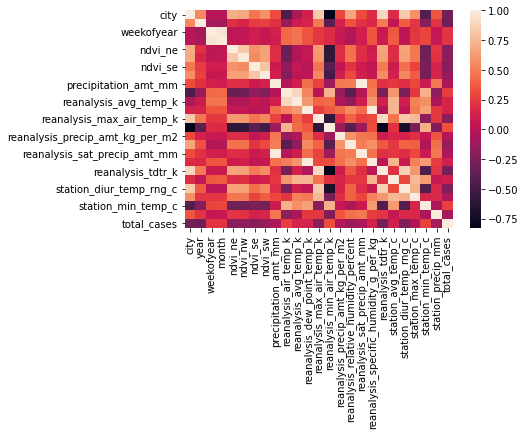

In [ ]:
sns.heatmap(df.corr());

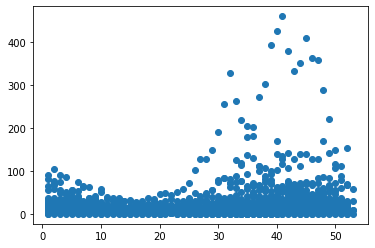

In [ ]:
plt.scatter(df['weekofyear'],df['total_cases'])
plt.show()

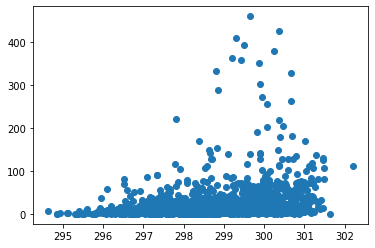

In [ ]:
plt.scatter(df['reanalysis_air_temp_k'],df['total_cases'])
plt.show()

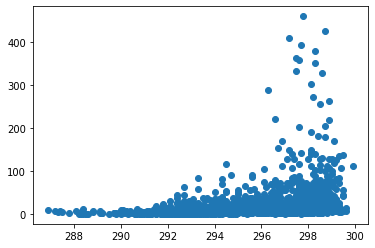

In [ ]:
plt.scatter(df['reanalysis_min_air_temp_k'],df['total_cases'])
plt.show()

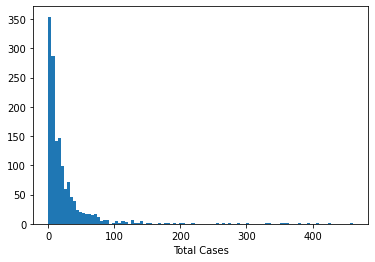

In [ ]:
plt.hist(df['total_cases'],bins=100)
plt.xlabel('Total Cases')
plt.show()

In [ ]:
n = 0
for i in range(len(df['total_cases'])):
  if(df['total_cases'][i]==0):
    n=n+1
print(n)

100


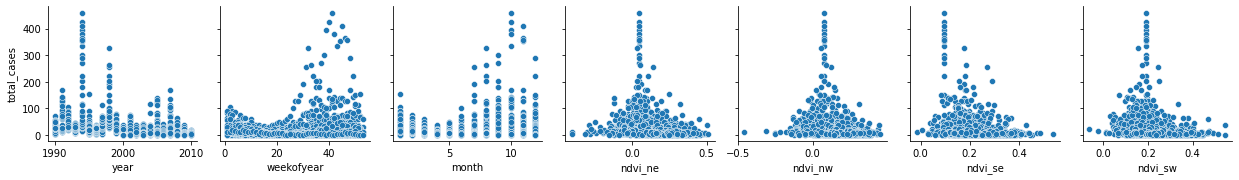

In [ ]:
sns.pairplot(data=df,
                  y_vars=['total_cases'],
                  x_vars=['year','weekofyear','month','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']);

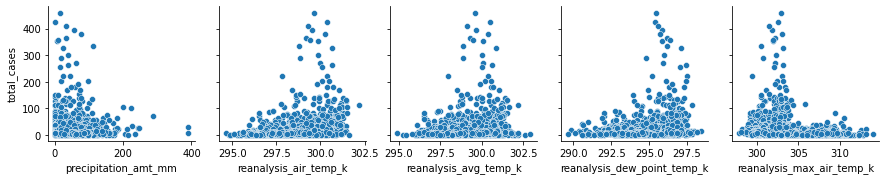

In [ ]:
sns.pairplot(data=df,
                  y_vars=['total_cases'],
                  x_vars=['precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k']);

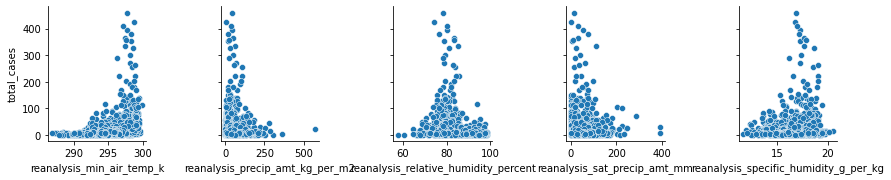

In [ ]:
sns.pairplot(data=df,
                  y_vars=['total_cases'],
                  x_vars=[
                          'reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2','reanalysis_relative_humidity_percent'
                          ,'reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg'  ]);

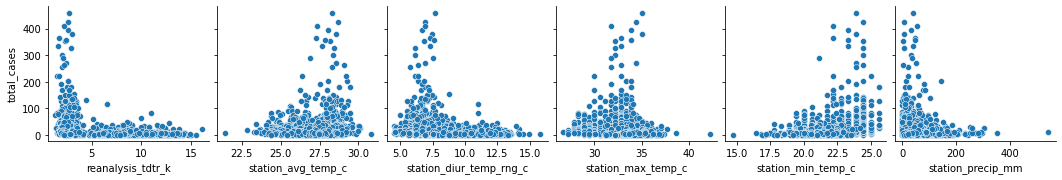

In [ ]:
sns.pairplot(data=df,
                  y_vars=['total_cases'],
                  x_vars=['reanalysis_tdtr_k','station_avg_temp_c',
                          'station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm'   ]);

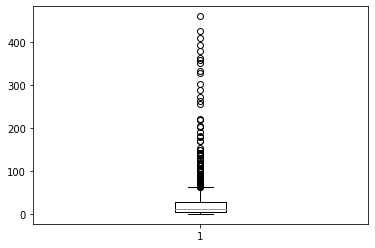

In [ ]:
plt.boxplot(df['total_cases']);

There are a lot of outliers in the total cases. These are important for the government. But the perfomance metric is given as MAE for the competetion , we have to use that.

In [ ]:
#transform the months
for i in range(len(df['month'])):
  if df['city'][i]==1:
    if df['month'][i]<=4:
      df['weekofyear'][i] = df['weekofyear'][i] + 36
      df['month'][i]=df['month'][i]+8
    else:
      df['weekofyear'][i] = df['weekofyear'][i] - 16
      df['month'][i]=df['month'][i]-4

<ipython-input-53-3f3d20aea095>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekofyear'][i] = df['weekofyear'][i] - 16
<ipython-input-53-3f3d20aea095>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][i]=df['month'][i]-4
<ipython-input-53-3f3d20aea095>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekofyear'][i] = df['weekofyear'][i] + 36
<ipython-input-53-3f3d20aea095>:6: SettingWithCopyWarning: 
A value is

In [ ]:
#transform the months
for i in range(len(test_df['month'])):
  if test_df['city'][i]==1:
    if test_df['month'][i]<=4:
      test_df['weekofyear'][i] = test_df['weekofyear'][i] + 36
      test_df['month'][i]=test_df['month'][i]+8
    else:
      test_df['weekofyear'][i] = test_df['weekofyear'][i] - 16
      test_df['month'][i]=test_df['month'][i]-4

<ipython-input-54-c2225d97d14f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['weekofyear'][i] = test_df['weekofyear'][i] - 16
<ipython-input-54-c2225d97d14f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['month'][i]=test_df['month'][i]-4
<ipython-input-54-c2225d97d14f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['weekofyear'][i] = test_df['weekofyear'][i] + 36
<ipython-input-54-c2225d97d14f>:6: Setti

In [ ]:
#convert all temperatures to Kelvin
df['station_max_temp_c'] = df['station_max_temp_c']+273.15
df['station_avg_temp_c'] = df['station_avg_temp_c']+273.15
df['station_min_temp_c'] = df['station_min_temp_c']+273.15
df['station_diur_temp_rng_c'] = df['station_diur_temp_rng_c']+273.15
test_df['station_max_temp_c'] = test_df['station_max_temp_c']+273.15
test_df['station_avg_temp_c'] = test_df['station_avg_temp_c']+273.15
test_df['station_min_temp_c'] = test_df['station_min_temp_c']+273.15
test_df['station_diur_temp_rng_c'] = test_df['station_diur_temp_rng_c']+273.15

# New features?


In [ ]:
df['veg'] = (df['ndvi_ne']+df['ndvi_nw']+df['ndvi_se']+df['ndvi_sw'])/4

In [ ]:
test_df['veg'] = (test_df['ndvi_ne']+test_df['ndvi_nw']+test_df['ndvi_se']+test_df['ndvi_sw'])/4

In [ ]:
X = df[['city','year','weekofyear','month','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','precipitation_amt_mm','reanalysis_air_temp_k',
     'reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k',
     'reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2','reanalysis_relative_humidity_percent'
                          ,'reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','station_avg_temp_c',
                          'station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','veg']]
y = df['total_cases']

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X_0 = scaler.transform(X)
X = pd.DataFrame(data = X_0, columns = X.columns)
X.head()

,city,year,weekofyear,month,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,veg
0,0.0,0.0,0.193182,0.272727,0.578226,0.614835,0.386418,0.395544,0.031797,0.388291,...,0.381614,0.031797,0.262659,0.086660,0.430091,0.210393,0.174194,0.486239,0.029450,0.407631
1,0.0,0.0,0.204545,0.363636,0.629943,0.657063,0.321190,0.359233,0.058423,0.472710,...,0.479668,0.058423,0.418164,0.069133,0.565350,0.163498,0.322581,0.688073,0.015829,0.419152
2,0.0,0.0,0.215909,0.363636,0.479441,0.690881,0.311879,0.384430,0.088428,0.548064,...,0.594415,0.088428,0.586900,0.064265,0.565350,0.173638,0.354839,0.743119,0.076201,0.378645
3,0.0,0.0,0.227273,0.363636,0.584823,0.770066,0.438912,0.491150,0.039324,0.575260,...,0.552387,0.039324,0.566808,0.073028,0.645897,0.198986,0.425806,0.788991,0.007362,0.505996
4,0.0,0.0,0.238636,0.363636,0.658698,0.788882,0.481601,0.509943,0.019252,0.645515,...,0.555396,0.019252,0.628226,0.112950,0.802432,0.429658,0.535484,0.844037,0.010676,0.556200


In [ ]:
test_df_0 = scaler.transform(test_df)
test_df = pd.DataFrame(data = test_df_0, columns = test_df.columns)
test_df.head()

,city,year,weekofyear,month,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,veg
0,0.0,0.9,0.193182,0.272727,0.423515,0.480161,0.213528,0.253755,0.201229,0.509915,...,0.514278,0.201229,0.480562,0.120740,0.545593,0.224335,0.425806,0.642202,0.138413,0.220598
1,0.0,0.9,0.204545,0.363636,0.424499,0.487299,0.176179,0.222768,0.032156,0.507649,...,0.500770,0.032156,0.466024,0.082765,0.496960,0.091255,0.212903,0.688073,0.063133,0.207115
2,0.0,0.9,0.215909,0.363636,0.442540,0.487299,0.300835,0.254294,0.009370,0.637205,...,0.501750,0.009370,0.566972,0.209348,0.694529,0.288973,0.393548,0.743119,0.005522,0.251016
3,0.0,0.9,0.227273,0.363636,0.442540,0.479099,0.252528,0.310338,0.000000,0.668178,...,0.373040,0.000000,0.464227,0.203505,0.708207,0.154626,0.425806,0.889908,0.000552,0.250989
4,0.0,0.9,0.238636,0.363636,0.506283,0.544665,0.140472,0.228675,0.001946,0.680076,...,0.399216,0.001946,0.505554,0.148978,0.661094,0.226869,0.425806,0.788991,0.154795,0.253573


In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Training time

Gamma distribution 

In [ ]:
model = sm.GLM(y_train, X_train, family=sm.families.Gamma()).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [ ]:
predictions = model.predict(X_test)
predictions = round(predictions,0)
score = eval_measures.meanabs(predictions, y_test)
print(score)

19.386986301369863


Negative Binomial distribution

In [ ]:
model = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial()).fit()

In [ ]:
predictions = model.predict(X_test)
predictions = round(predictions,0)
score = eval_measures.meanabs(predictions, y_test)
print(score)

16.97945205479452


Random forests

In [ ]:
rf = RandomForestRegressor(max_features=7, n_estimators=500, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=7, n_estimators=500, random_state=1)

In [ ]:
predictions = rf.predict(X_test).astype(int)
score = eval_measures.meanabs(predictions, y_test)
print(score)

11.66095890410959


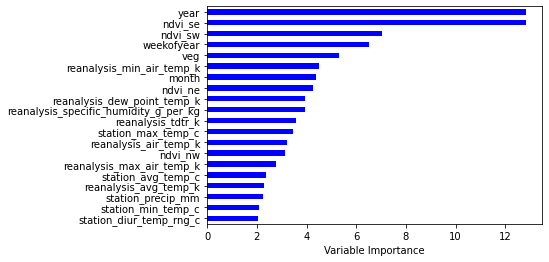

In [ ]:
Importance_ = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=X_train.columns)
Importance = Importance_.sort_values('Importance', axis=0, ascending=False)[0:20]
Importance.plot(kind='barh', color='b', ).invert_yaxis()
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
results = rf.predict(test_df).astype(int).tolist()

In [ ]:
results_df = pd.DataFrame()
results_df['city'] = (pd.read_csv('test_data_features.csv'))['city']
results_df['year'] = test_df['year']
results_df['weekofyear'] = test_df['weekofyear']
results_df['total_cases'] = results

In [ ]:
results_df

,city,year,weekofyear,total_cases
0,sj,0.90,0.193182,5
1,sj,0.90,0.204545,6
2,sj,0.90,0.215909,10
3,sj,0.90,0.227273,15
4,sj,0.90,0.238636,17
...,...,...,...,...
411,iq,1.15,0.056818,5
412,iq,1.15,0.068182,4
413,iq,1.15,0.079545,2
414,iq,1.15,0.090909,3


In [ ]:
results_df.to_csv('results.csv', index=False)

In [ ]:
rf = RandomForestRegressor(max_features=7,max_depth= 2, n_estimators=500, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, max_features=7, n_estimators=500,
                      random_state=1)

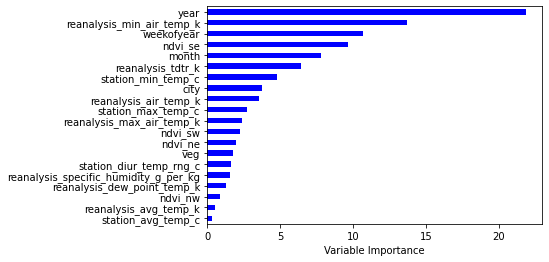

In [ ]:
Importance_ = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=X_train.columns)
Importance = Importance_.sort_values('Importance', axis=0, ascending=False)[0:20]
Importance.plot(kind='barh', color='b', ).invert_yaxis()
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
boost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01,random_state=1)
boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=5000, random_state=1)

In [ ]:
predictions = boost.predict(X_test).astype(int)
score = eval_measures.meanabs(predictions, y_test)
print(score)

11.20890410958904


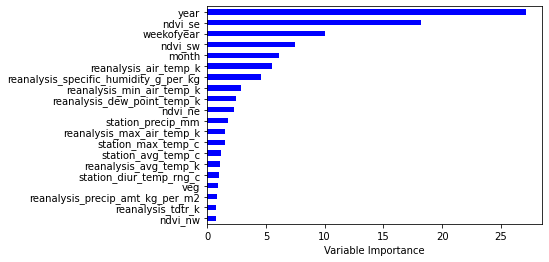

In [ ]:
Importance_ = pd.DataFrame({'Importance':boost.feature_importances_*100}, index=X_train.columns)
Importance = Importance_.sort_values('Importance', axis=0, ascending=False)[0:20]
Importance.plot(kind='barh', color='b', ).invert_yaxis()
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
results = boost.predict(test_df).astype(int).tolist()

In [ ]:
results_df = pd.DataFrame()
results_df['city'] = (pd.read_csv('test_data_features.csv'))['city']
results_df['year'] = (pd.read_csv('test_data_features.csv'))['year']
results_df['weekofyear'] = (pd.read_csv('test_data_features.csv'))['weekofyear']
results_df['total_cases'] = results

In [ ]:
results_df.to_csv('results.csv', index=False)

In [ ]:
def backward_selection(X, y, pvalue_threshold = 0.05):
    # start with all the colums
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    included=list(X.columns)
    score_min = sys.maxsize
    while True:
        print("Features included: ",included)
        model = sm.GLM(y_train, pd.DataFrame(X_train[included]), family=sm.families.NegativeBinomial()).fit()
        predictions = round(model.predict(pd.DataFrame(X_test[included])),0)
        score = eval_measures.meanabs(predictions, y_test)
        print(score)
        pvalues = model.pvalues.iloc[1:] #exclude pvalue of intercept
        max_pvalue = pvalues.max()
        if score_min > score:
            score_min = score
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            print(f"Dropping {worst_feature} with p-value {max_pvalue:.4}")
            continue
        break
    return included

In [ ]:
backward_selection(X,y)

Features included:  ['city', 'year', 'weekofyear', 'month', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']
16.94178082191781
Dropping station_diur_temp_rng_c with p-value 0.9409
Features included:  ['city', 'year', 'weekofyear', 'month', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'rean

['city',
 'year',
 'weekofyear',
 'month',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

# Spliting according to cities

In [ ]:
sj_df = df[df['city']==0]
iq_df = df[df['city']==1]

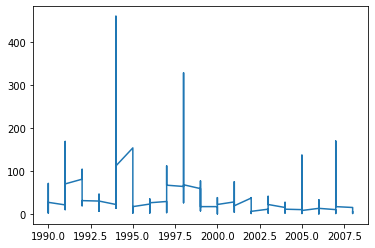

In [ ]:
plt.plot(sj_df['year'],sj_df['total_cases']);

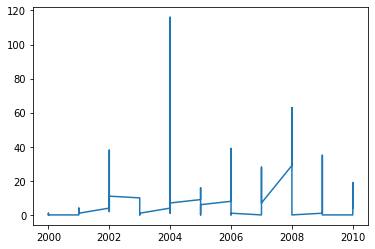

In [ ]:
plt.plot(iq_df['year'],iq_df['total_cases']);

In [ ]:
sj_X = sj_df[['city','year','month','weekofyear','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','precipitation_amt_mm','reanalysis_air_temp_k',
     'reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k',
     'reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2','reanalysis_relative_humidity_percent'
                          ,'reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','station_avg_temp_c',
                          'station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','veg']]
sj_y = sj_df['total_cases']
iq_X = iq_df[['city','year','month','weekofyear','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','precipitation_amt_mm','reanalysis_air_temp_k',
     'reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k',
     'reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2','reanalysis_relative_humidity_percent'
                          ,'reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','station_avg_temp_c',
                          'station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','veg']]
iq_y = iq_df['total_cases']

In [ ]:
plt.scatter(sj_df['month'],sj_df['total_cases'])
plt.show()

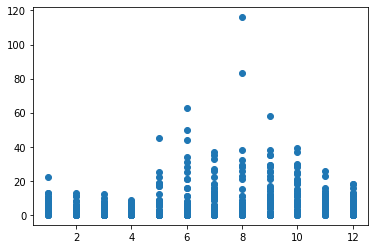

In [ ]:

plt.scatter(iq_df['month'],iq_df['total_cases'])
plt.show()

In [ ]:
sj_X_train, sj_X_test , sj_y_train, sj_y_test = train_test_split(sj_X, sj_y, test_size=0.20, random_state=1)
iq_X_train, iq_X_test , iq_y_train, iq_y_test = train_test_split(iq_X, iq_y, test_size=0.20, random_state=1)

In [ ]:
model = sm.GLM(sj_y_train, sj_X_train, family=sm.families.Gamma()).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [ ]:
predictions = model.predict(sj_X_test)
predictions = round(predictions,0)
score = eval_measures.meanabs(predictions, sj_y_test)
print(score)

39.46808510638298


In [ ]:
model = sm.GLM(iq_y_train, iq_X_train, family=sm.families.Gamma()).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [ ]:
predictions = model.predict(iq_X_test)
predictions = round(predictions,0)
score = eval_measures.meanabs(predictions, iq_y_test)
print(score)

10.067307692307692


In [ ]:
print('MAE for GLM split:' ,(39.468*936+ 10.067*520)/1456)

MAE for GLM split: 28.967642857142863


In [ ]:
model = sm.GLM(sj_y_train, sj_X_train, family=sm.families.NegativeBinomial()).fit()

In [ ]:
predictions = model.predict(sj_X_test)
predictions = round(predictions,0)
score = eval_measures.meanabs(predictions, sj_y_test)
print(score)

25.175531914893618


In [ ]:
model = sm.GLM(iq_y_train, iq_X_train, family=sm.families.NegativeBinomial()).fit()

In [ ]:
predictions = model.predict(iq_X_test)
predictions = round(predictions,0)
score = eval_measures.meanabs(predictions, iq_y_test)
print(score)

5.894230769230769


In [ ]:
print('MAE for GLM negative binomial split:' ,(25.1755*936+ 5.8942*520)/1456)

MAE for GLM negative binomial split: 18.28932142857143


In [ ]:
rf = RandomForestRegressor(max_features=7, n_estimators=500, random_state=1)
rf.fit(sj_X_train, sj_y_train)

RandomForestRegressor(max_features=7, n_estimators=500, random_state=1)

In [ ]:
predictions = rf.predict(sj_X_test).astype(int)
score = eval_measures.meanabs(predictions, sj_y_test)
print(score)

17.24468085106383


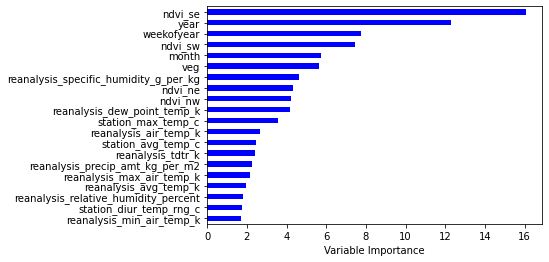

In [ ]:
Importance_ = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=sj_X_train.columns)
Importance = Importance_.sort_values('Importance', axis=0, ascending=False)[0:20]
Importance.plot(kind='barh', color='b', ).invert_yaxis()
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
rf = RandomForestRegressor(max_features=7, n_estimators=500, random_state=1)
rf.fit(iq_X_train, iq_y_train)

RandomForestRegressor(max_features=7, n_estimators=500, random_state=1)

In [ ]:
predictions = rf.predict(iq_X_test).astype(int)
score = eval_measures.meanabs(predictions, iq_y_test)
print(score)

4.865384615384615


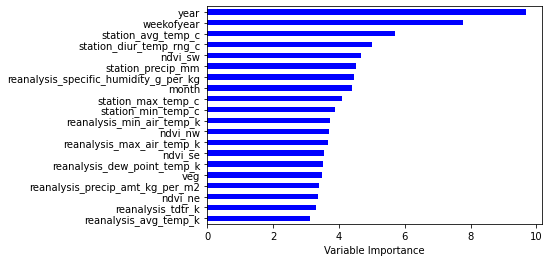

In [ ]:
Importance_ = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=iq_X_train.columns)
Importance = Importance_.sort_values('Importance', axis=0, ascending=False)[0:20]
Importance.plot(kind='barh', color='b', ).invert_yaxis()
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
print('MAE for rf split:' ,(17.2446*936+ 4.8653*520)/1456)

MAE for rf split: 12.823421428571427


In [ ]:
boost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01,random_state=1)
boost.fit(sj_X_train, sj_y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=5000, random_state=1)

In [ ]:
predictions = boost.predict(sj_X_test).astype(int)
score = eval_measures.meanabs(predictions, sj_y_test)
print(score)

16.0531914893617


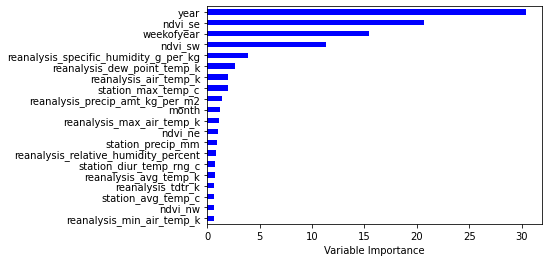

In [ ]:
feature_importance = boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=sj_X_train.columns).sort_values(ascending=False, inplace=False)
rel_imp = rel_imp[0:20]
rel_imp.plot(kind='barh', color='b', ).invert_yaxis()
plt.xlabel('Variable Importance');

In [ ]:
boost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01,random_state=1)
boost.fit(iq_X_train, iq_y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=5000, random_state=1)

In [ ]:
predictions = boost.predict(iq_X_test).astype(int)
score = eval_measures.meanabs(predictions, iq_y_test)
print(score)

5.490384615384615


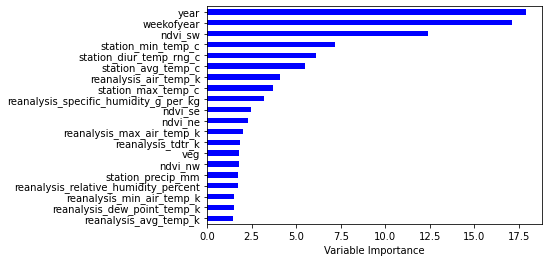

In [ ]:
feature_importance = boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=iq_X_train.columns).sort_values(ascending=False, inplace=False)
rel_imp = rel_imp[0:20]
rel_imp.plot(kind='barh', color='b', ).invert_yaxis()
plt.xlabel('Variable Importance');

In [ ]:
print('MAE for GB split:' ,(16.0531*936+ 5.4903*520)/1456)

MAE for GB split: 12.280671428571427


In [ ]:
from io import StringIO  

import pydot
from IPython.display import Image
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [ ]:
tree_first = DecisionTreeRegressor(max_leaf_nodes=6,criterion="absolute_error")

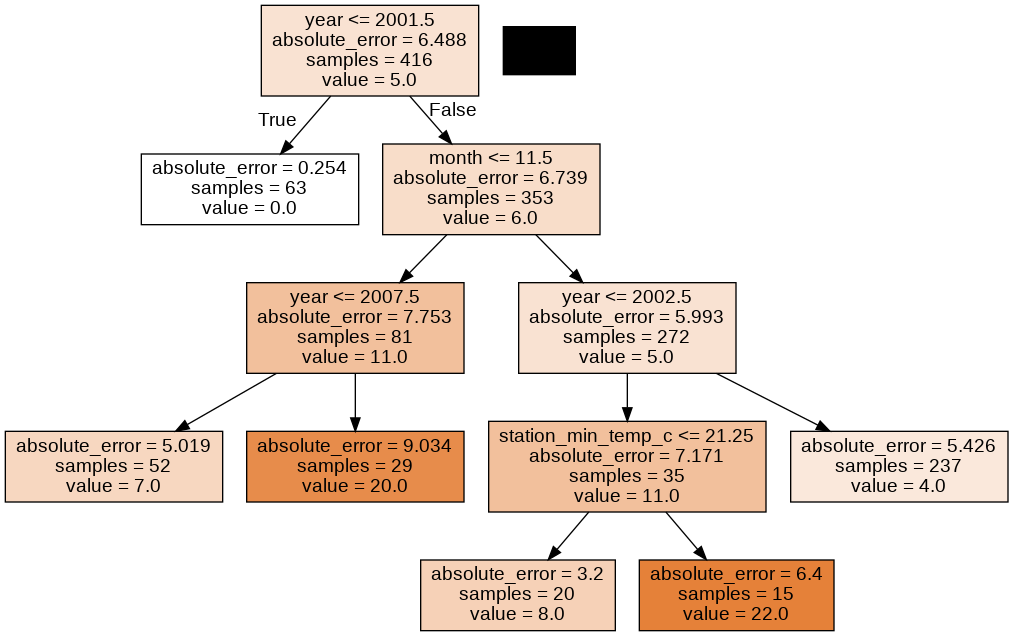

In [ ]:
tree_first.fit(iq_X_train, iq_y_train)
graph, = print_tree(tree_first, features=X_train.columns)
Image(graph.create_png())